In [1]:
import random
import copy
import logging
import sys
import os
import sys
import importlib
import numpy as np
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot
import seaborn as sns


sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import plot_utility

script_n = 'plot_210619_1d_local'

data_script = 'batch_210617_stability_vs_redundancy_1d'
db_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/' \
            f'{data_script}/'

n_mfs = 488
n_grcs = 1459
pattern_type = 'binary'
# db = {}
db = defaultdict(lambda: {})
direction = '01'

for noise in [0.05, 0.1, .25, .5, .75, 1.0]:

#     model = 'shuffle'
#     db[model][noise] = compress_pickle.load(
#         db_path+f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_dir_{direction}_noise_{noise}_0.3_256_40.gz')

    model = 'local_random'
    db[model][noise] = compress_pickle.load(
        db_path+f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_dir_{direction}_noise_{noise}_0.3_256_40.gz')

    for redundancy in [2.0, 3.0, 4.0, 8.0, 12.0, 16.0]:
        for n_share in [2]:
            model = f'local_random_{redundancy}_{n_share}'
            db[model][noise] = compress_pickle.load(
                db_path+f'{data_script}_local_random_redundant_{redundancy}_nshare_{n_share}_{pattern_type}_{n_grcs}_{n_mfs}_dir_{direction}_noise_{noise}_0.3_256_40.gz')

            

In [36]:

name_map = {
        'scaleup4': "Observed",
        'global_random': "Global Random",
        'random': "Global Random",
        'local_random': "Shuffle",
}

palette = {
    name_map['scaleup4']: sns.color_palette()[0],
    name_map['global_random']: sns.color_palette()[1],
    name_map['random']: sns.color_palette()[1],
    name_map['local_random']: sns.color_palette()[2],
#     name_map['naive_random_21']: sns.color_palette()[2],
}


In [16]:
res

NameError: name 'res' is not defined

Height: 7.518796992481203, Aspect: 1.33


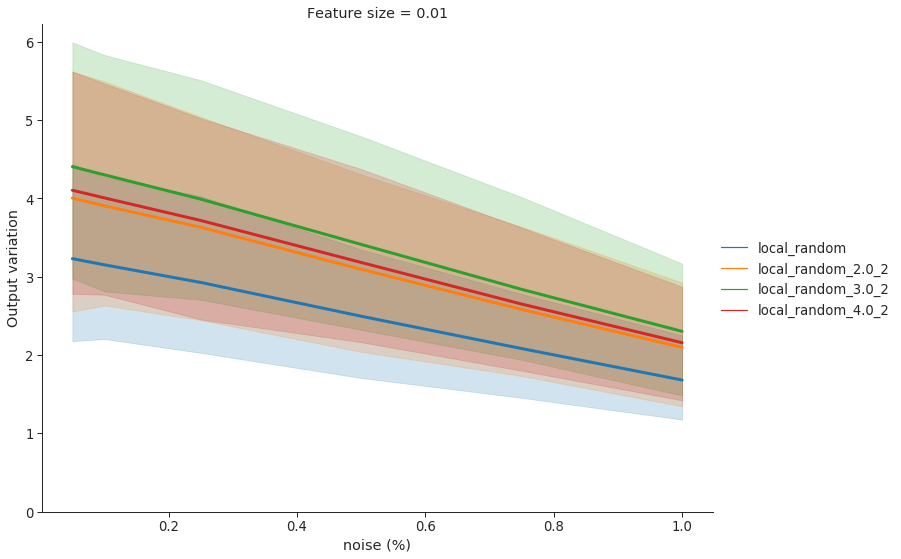

In [18]:
models = [
#         'shuffle',
        'local_random',
# #         'local_random_2.0_2',
#         'local_random_16.0_2',
#         'local_random_16.0_3',
#         'local_random_16.0_4',
        'local_random_2.0_2',
        'local_random_3.0_2',
        'local_random_4.0_2',
#         'local_random_8.0_2',
#         'local_random_16.0_2',
#         'local_random_4.0_2',
#         'local_random_4.0_3',
#         'local_random_4.0_4',
        ]

feature_size = 0.01
feature = 'avg_delta'
importlib.reload(plot_utility); importlib.reload(my_plot); my_plot.my_relplot(
    plot_utility.build_mpd(feature_size, models, db),
    x='noise',
    y=feature,
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=3,
    width=10,
    ylim=[0, None],
#     xlim=[0, 150],
    y_axis_label='Output variation',
    x_axis_label='noise (%)',
    title=f'Feature size = {feature_size}',
    save_filename=f'{script_n}_{feature}_feature_{feature_size}.svg',
    show=True,
    )


Height: 7.518796992481203, Aspect: 1.33


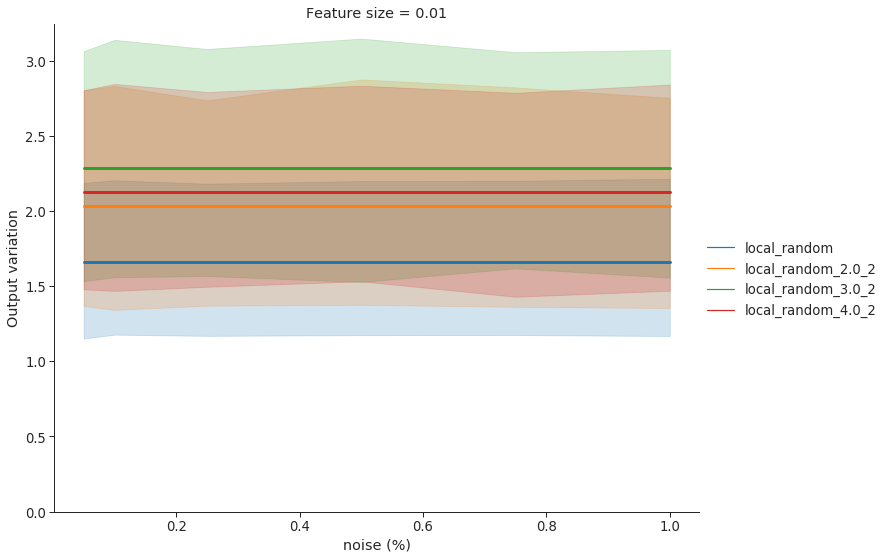

In [21]:
models = [
#         'shuffle',
        'local_random',
# #         'local_random_2.0_2',
#         'local_random_16.0_2',
#         'local_random_16.0_3',
#         'local_random_16.0_4',
        'local_random_2.0_2',
        'local_random_3.0_2',
        'local_random_4.0_2',
#         'local_random_8.0_2',
#         'local_random_16.0_2',
#         'local_random_4.0_2',
#         'local_random_4.0_3',
#         'local_random_4.0_4',
        ]

feature_size = 0.01
feature = 'avg_masked_random_delta'
importlib.reload(plot_utility); importlib.reload(my_plot); my_plot.my_relplot(
    plot_utility.build_mpd(feature_size, models, db),
    x='noise',
    y=feature,
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=3,
    width=10,
    ylim=[0, None],
#     xlim=[0, 150],
    y_axis_label='Output variation',
    x_axis_label='noise (%)',
    title=f'Feature size = {feature_size}',
    save_filename=f'{script_n}_{feature}_feature_{feature_size}.svg',
    show=True,
    )


Height: 7.518796992481203, Aspect: 1.33


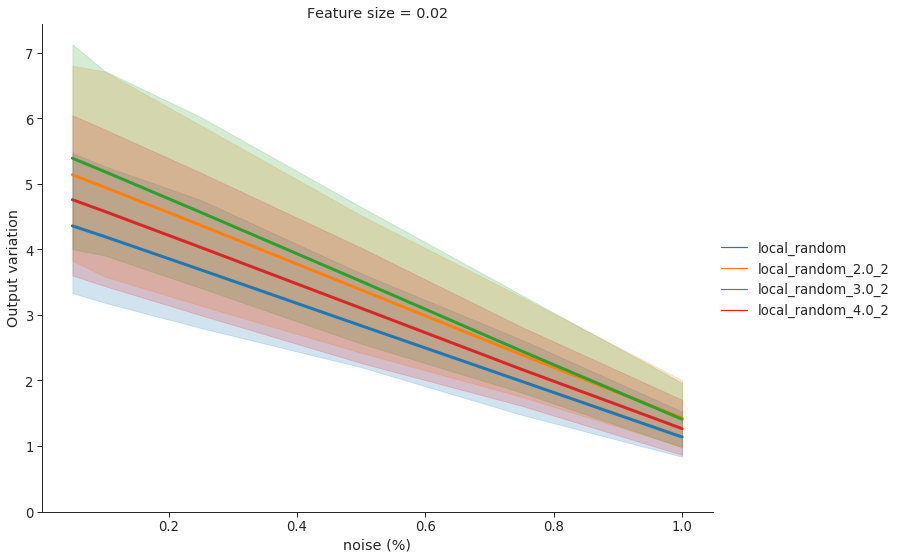

In [12]:
models = [
#         'shuffle',
        'local_random',
# #         'local_random_2.0_2',
#         'local_random_16.0_2',
#         'local_random_16.0_3',
#         'local_random_16.0_4',
        'local_random_2.0_2',
        'local_random_3.0_2',
        'local_random_4.0_2',
#         'local_random_8.0_2',
#         'local_random_12.0_2',
#         'local_random_16.0_2',
#         'local_random_4.0_2',
#         'local_random_4.0_3',
#         'local_random_4.0_4',
        ]

feature_size = 0.02
feature = 'avg_delta_minus_random'
importlib.reload(plot_utility); importlib.reload(my_plot); my_plot.my_relplot(
    plot_utility.build_mpd(feature_size, models, db),
    x='noise',
    y=feature,
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=3,
    width=10,
    ylim=[0, None],
#     xlim=[0, 150],
    y_axis_label='Output variation',
    x_axis_label='noise (%)',
    title=f'Feature size = {feature_size}',
    save_filename=f'{script_n}_{feature}_feature_{feature_size}_1731.svg',
    show=True,
    )


Height: 7.518796992481203, Aspect: 1.33


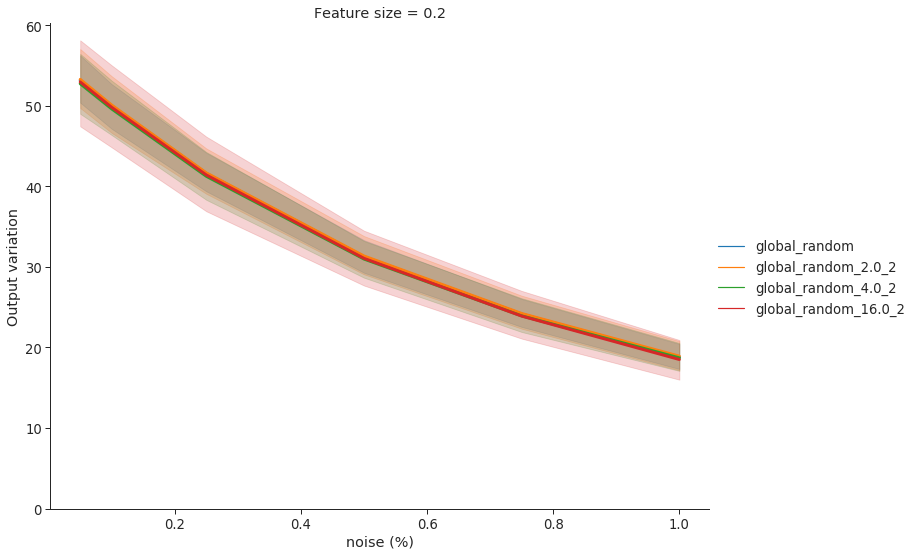

In [53]:
models = [
#         'shuffle',
        'global_random',
# #         'global_random_2.0_2',
#         'global_random_16.0_2',
#         'global_random_16.0_3',
#         'global_random_16.0_4',
        'global_random_2.0_2',
#         'global_random_3.0_2',
        'global_random_4.0_2',
#         'global_random_8.0_2',
        'global_random_16.0_2',
#         'global_random_4.0_2',
#         'global_random_4.0_3',
#         'global_random_4.0_4',
        ]
feature_size = 0.2
feature = 'avg_delta_minus_random'
importlib.reload(plot_utility); importlib.reload(my_plot); my_plot.my_relplot(
    plot_utility.build_mpd(feature_size, models, db),
    x='noise',
    y=feature,
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=3,
    width=10,
    ylim=[0, None],
#     xlim=[0, 150],
    y_axis_label='Output variation',
    x_axis_label='noise (%)',
    title=f'Feature size = {feature_size}',
    save_filename=f'{script_n}_{feature}_feature_{feature_size}_2047.svg',
    show=True,
    )


Height: 7.518796992481203, Aspect: 1.33


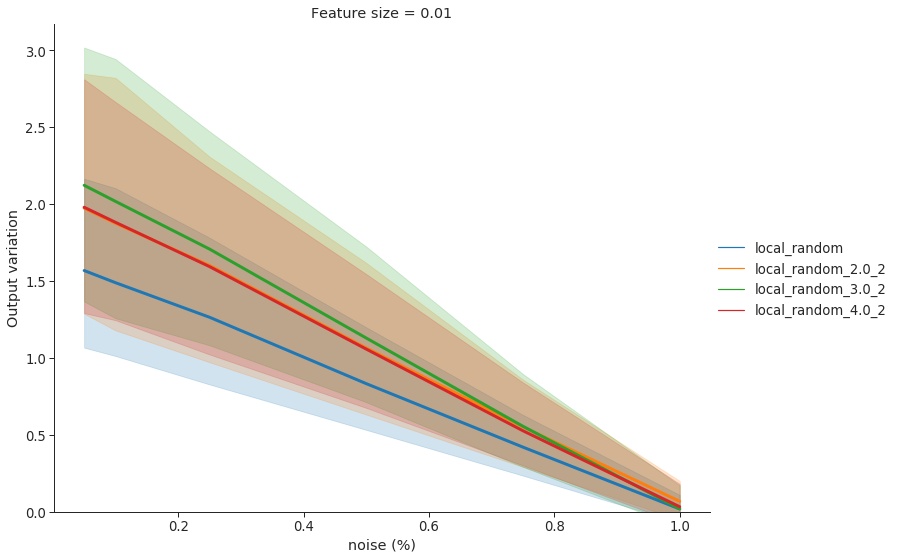

In [22]:
models = [
#         'shuffle',
        'local_random',
# #         'local_random_2.0_2',
#         'local_random_16.0_2',
#         'local_random_16.0_3',
#         'local_random_16.0_4',
        'local_random_2.0_2',
        'local_random_3.0_2',
        'local_random_4.0_2',
#         'local_random_8.0_2',
#         'local_random_16.0_2',
#         'local_random_4.0_2',
#         'local_random_4.0_3',
#         'local_random_4.0_4',
        ]

feature_size = 0.01
feature = 'avg_delta_minus_masked_random'
importlib.reload(plot_utility); importlib.reload(my_plot); my_plot.my_relplot(
    plot_utility.build_mpd(feature_size, models, db),
    x='noise',
    y=feature,
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=3,
    width=10,
    ylim=[0, None],
#     xlim=[0, 150],
    y_axis_label='Output variation',
    x_axis_label='noise (%)',
    title=f'Feature size = {feature_size}',
    save_filename=f'{script_n}_{feature}_feature_{feature_size}_1746.svg',
    show=True,
    )


Height: 7.518796992481203, Aspect: 1.33


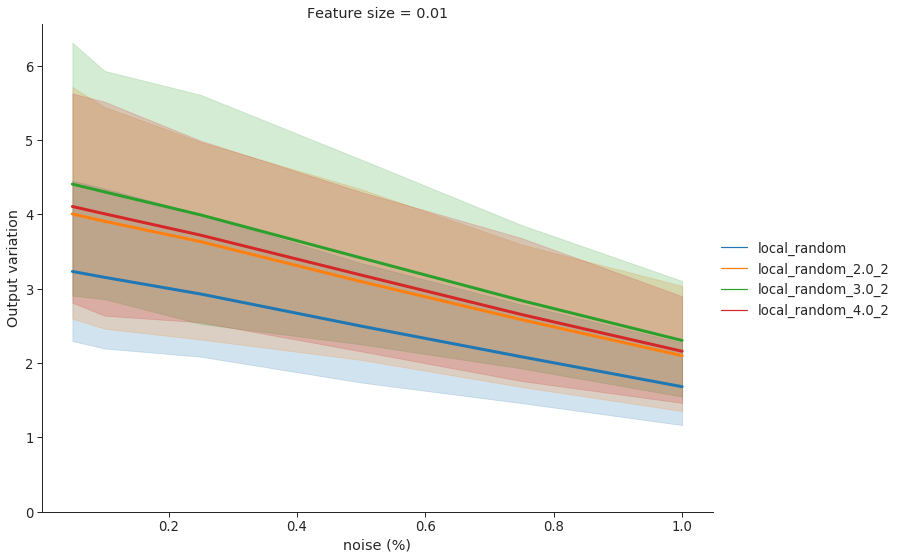

In [23]:
models = [
#         'shuffle',
        'local_random',
# #         'local_random_2.0_2',
#         'local_random_16.0_2',
#         'local_random_16.0_3',
#         'local_random_16.0_4',
        'local_random_2.0_2',
        'local_random_3.0_2',
        'local_random_4.0_2',
#         'local_random_8.0_2',
#         'local_random_16.0_2',
#         'local_random_4.0_2',
#         'local_random_4.0_3',
#         'local_random_4.0_4',
        ]

feature_size = 0.01
feature = 'avg_delta'
importlib.reload(plot_utility); importlib.reload(my_plot); my_plot.my_relplot(
    plot_utility.build_mpd(feature_size, models, db),
    x='noise',
    y=feature,
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=3,
    width=10,
    ylim=[0, None],
#     xlim=[0, 150],
    y_axis_label='Output variation',
    x_axis_label='noise (%)',
    title=f'Feature size = {feature_size}',
    save_filename=f'{script_n}_{feature}_feature_{feature_size}_1644.svg',
    show=True,
    )
